# Análise Exploratória de Dados - Visão Geral

Este notebook apresenta uma visão geral dos dados do perfil de vento, explorando a estrutura do conjunto de dados, estatísticas descritivas e características principais.

In [26]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys
import os

# Adicionar diretório src ao path para importar o módulo utils
sys.path.append('../src')
import utils

# Configurar estilo de visualização
colors = utils.set_plotting_style()

# Configurar opções de visualização do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 1. Carregamento e Inspeção Inicial dos Dados

Começamos carregando o conjunto de dados e realizando uma inspeção inicial para entender sua estrutura e conteúdo.

In [27]:
# Carregar dados
data_path = '../data/dataset.csv'
print("Carregando os dados do arquivo:", data_path)
df = utils.load_wind_data(data_path)

# Exibir informações básicas
print(f"Formato do conjunto de dados: {df.shape}")
print(f"Período de tempo coberto: {df.index.min()} até {df.index.max()}")
print(f"Tipo do índice: {type(df.index)}")

# Visualizar as primeiras linhas
df.head()

Carregando os dados do arquivo: ../data/dataset.csv
Formato do conjunto de dados: (7561, 130)
Período de tempo coberto: 2021-09-16 18:00:00 até 2021-11-08 14:29:59
Tipo do índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,id,year,month,day,hour,minute,press,humid,temp,ws40,ws50,ws60,ws70,ws80,ws90,ws100,ws110,ws120,ws130,ws140,ws150,ws160,ws170,ws180,ws190,ws200,ws220,ws240,ws260,verts40,verts50,verts60,verts70,verts80,verts90,verts100,verts110,verts120,verts130,verts140,verts150,verts160,verts170,verts180,verts190,verts200,verts220,verts240,verts260,wdir40,wdir50,wdir60,wdir70,wdir80,wdir90,wdir100,wdir110,wdir120,wdir130,wdir140,wdir150,wdir160,wdir170,wdir180,wdir190,wdir200,wdir220,wdir240,wdir260,cis1,cis2,cis3,cis4,cis5,cis6,cis7,cis8,cis9,cis10,cis11,cis12,cis13,cis14,cis15,cis16,cis17,cis18,cis19,wdisp40,wdisp50,wdisp60,wdisp70,wdisp80,wdisp90,wdisp100,wdisp110,wdisp120,wdisp130,wdisp140,wdisp150,wdisp160,wdisp170,wdisp180,wdisp190,wdisp200,wdisp220,wdisp240,wdisp260,vertdisp40,vertdisp50,vertdisp60,vertdisp70,vertdisp80,vertdisp90,vertdisp100,vertdisp110,vertdisp120,vertdisp130,vertdisp140,vertdisp150,vertdisp160,vertdisp170,vertdisp180,vertdisp190,vertdisp200,vertdisp220,vertdisp240,vertdisp260,hour_of_day,day_of_week
id_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-16 18:00:00,2021-09-16 18:00:00,2021,9,16,18,0,1012,78,27.6,7.44,7.64,7.82,8.04,8.21,8.36,8.51,8.65,8.73,8.79,8.83,8.87,8.91,8.94,8.98,9.04,9.10,9.22,9.36,9.51,-0.13,-0.12,-0.08,-0.04,-0.02,-0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.00,0.02,53.95,53.89,54.07,54.31,54.24,54.08,53.95,53.79,53.78,53.83,53.92,54.11,54.32,54.38,54.45,54.59,54.80,54.86,54.75,54.98,0.020,0.018,0.022,0.017,0.015,0.015,0.014,0.008,0.006,0.004,0.004,0.004,0.003,0.004,0.006,0.006,0.0060,0.0070,0.0075,1.22,1.25,1.23,1.20,1.18,1.17,1.16,1.11,1.06,1.05,1.06,1.05,1.01,0.99,0.98,0.97,0.97,0.96,0.93,0.86,0.39,0.39,0.42,0.44,0.45,0.48,0.47,0.46,0.45,0.44,0.44,0.44,0.44,0.45,0.46,0.49,0.51,0.54,0.56,0.62,18,3
2021-09-16 18:10:00,2021-09-16 18:10:00.000004,2021,9,16,18,10,1012,78,27.5,7.45,7.79,8.09,8.33,8.47,8.56,8.64,8.72,8.78,8.85,8.93,8.99,9.03,9.07,9.11,9.17,9.24,9.37,9.44,9.47,-0.10,-0.09,-0.06,-0.05,-0.04,-0.02,0.01,0.03,0.05,0.06,0.06,0.06,0.06,0.06,0.04,0.03,0.03,0.05,0.04,0.05,51.22,52.41,52.72,52.45,52.26,52.24,52.19,51.90,51.63,51.51,51.55,51.69,51.73,51.69,51.67,51.64,51.55,51.33,51.83,52.08,0.034,0.030,0.024,0.014,0.009,0.008,0.008,0.006,0.007,0.008,0.006,0.004,0.004,0.004,0.006,0.007,0.0065,0.0035,0.0015,0.96,0.98,1.00,1.04,1.05,1.05,1.04,1.03,1.02,1.01,0.99,0.99,0.98,0.98,0.99,0.97,0.94,0.89,0.87,0.89,0.44,0.45,0.48,0.51,0.52,0.52,0.50,0.49,0.46,0.46,0.48,0.50,0.51,0.53,0.54,0.54,0.52,0.51,0.47,0.47,18,3
2021-09-16 18:19:59,2021-09-16 18:19:59.999999,2021,9,16,18,19,1012,78,27.5,7.59,7.86,8.06,8.24,8.43,8.55,8.65,8.75,8.85,8.94,9.00,9.06,9.12,9.18,9.22,9.25,9.28,9.41,9.53,9.67,-0.16,-0.15,-0.16,-0.17,-0.15,-0.11,-0.07,-0.06,-0.05,-0.06,-0.06,-0.05,-0.04,-0.03,-0.02,0.00,0.02,0.03,0.02,0.02,51.62,51.51,51.43,51.42,51.58,51.77,52.02,52.12,52.21,52.36,52.34,52.13,52.11,52.17,52.20,52.26,52.38,52.63,53.08,53.58,0.027,0.020,0.018,0.019,0.012,0.010,0.010,0.010,0.009,0.006,0.006,0.006,0.006,0.004,0.003,0.003,0.0065,0.0060,0.0070,1.12,1.12,1.09,1.08,1.07,1.07,1.04,0.99,0.95,0.92,0.91,0.88,0.84,0.81,0.80,0.79,0.78,0.73,0.73,0.75,0.38,0.37,0.36,0.35,0.35,0.36,0.35,0.34,0.34,0.34,0.33,0.35,0.37,0.38,0.39,0.39,0.38,0.37,0.35,0.36,18,3
2021-09-16 18:30:00,2021-09-16 18:30:00.000003,2021,9,16,18,30,1012,79,27.5,7.64,7.90,8.14,8.35,8.53,8.69,8.86,9.02,9.13,9.24,9.32,9.38,9.45,9.55,9.65,9.74,9.84,9.95,10.08,10.20,-0.14,-0.14,-0.15,-0.17,-0.16,-0.13,-0.11,-0.08,-0.06,-0.05,-0.03,-0.02,-0.01,0.00,0.01,0.02,0.01,0.00,0.02,-0.01,53.43,53.55,53.50,53.53,53.62,53.58,53.65,53.73,53.65,53.53,53.50,53.52,53.70,53.98,54.38,54.71,54.98,55.40,55.29,55.44,0.026,0.024,0.021,0.018,0.016,0.017,0.016,0.011,0.011,0.008,0.006,0.007,0.010,0.010,0.009,0.010,0.0055,0.0065,0.0060,1.07,1.10,1.09,1.02,0.98,0.98,0.96,0.94,0.92,0.92,0.92,0.92,0.94,0.97,0.97,0.95,0.94,0.93,0.91,0.85,0.45,0.44,0.43,0.40,0.40,0.43

In [28]:
# Verificar tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7561 entries, 2021-09-16 18:00:00 to 2021-11-08 14:29:59
Columns: 130 entries, id to day_of_week
dtypes: float64(120), int32(5), int64(4), object(1)
memory usage: 7.4+ MB


## 2. Estatísticas Descritivas

Vamos analisar as estatísticas descritivas das principais variáveis para entender a distribuição e as características dos dados.

In [29]:
# Selecionar colunas por tipo de medição
ws_cols = utils.get_height_columns(df, 'ws')
wdir_cols = utils.get_height_columns(df, 'wdir')
verts_cols = utils.get_height_columns(df, 'verts')
cis_cols = [col for col in df.columns if col.startswith('cis')]

# Exibir estatísticas para velocidade do vento
print("Estatísticas da Velocidade do Vento")
ws_stats = df[ws_cols].describe().T
ws_stats['height'] = [int(col.replace('ws', '')) for col in ws_stats.index]
ws_stats.sort_values('height', inplace=True)
ws_stats

Estatísticas da Velocidade do Vento


,count,mean,std,min,25%,50%,75%,max,height
ws40,7561.0,8.364788,1.680321,1.83,7.32,8.33,9.51,13.57,40
ws50,7561.0,8.592555,1.671181,2.23,7.55,8.58,9.73,13.78,50
ws60,7561.0,8.778278,1.663755,2.27,7.72,8.79,9.91,13.94,60
ws70,7561.0,8.936783,1.659902,2.27,7.86,8.96,10.08,14.05,70
ws80,7561.0,9.068934,1.660396,2.26,7.99,9.09,10.20,14.40,80
ws90,7561.0,9.180279,1.663300,2.37,8.09,9.20,10.31,14.69,90
ws100,7561.0,9.278070,1.668284,2.48,8.17,9.29,10.40,14.92,100
ws110,7561.0,9.365647,1.675536,2.54,8.25,9.38,10.50,15.19,110
ws120,7561.0,9.440803,1.683937,2.56,8.30,9.46,10.58,15.49,120
ws130,7561.0,9.513309,1.693716,2.60,8.35,9.54,10.65,15.76,130


In [30]:
# Estatísticas da direção do vento
print("Estatísticas da Direção do Vento")
df[wdir_cols].describe().T

Estatísticas da Direção do Vento


,count,mean,std,min,25%,50%,75%,max
wdir40,7561.0,58.614682,20.168869,0.94,47.89,56.54,65.49,357.47
wdir50,7561.0,58.418606,18.977582,2.22,47.81,56.66,65.56,351.53
wdir60,7561.0,58.387048,18.918248,7.56,47.79,56.68,65.64,359.92
wdir70,7561.0,58.177187,17.553366,2.20,47.75,56.76,65.70,359.21
wdir80,7561.0,58.129110,17.112860,6.03,47.78,56.81,65.73,356.86
wdir90,7561.0,58.086396,16.694295,2.55,47.78,56.84,65.73,299.97
wdir100,7561.0,58.095899,16.630379,7.39,47.78,56.92,65.83,311.34
wdir110,7561.0,58.107492,16.574885,9.55,47.79,56.95,65.87,324.54
wdir120,7561.0,58.123787,16.522212,9.58,47.85,56.99,65.97,334.73
wdir130,7561.0,58.149602,16.469260,9.59,47.87,57.03,66.00,343.77


In [31]:
# Estatísticas das componentes verticais
print("Estatísticas das Componentes Verticais do Vento")
df[verts_cols].describe().T

Estatísticas das Componentes Verticais do Vento


,count,mean,std,min,25%,50%,75%,max
verts40,7561.0,-0.123068,0.184801,-1.03,-0.19,-0.11,-0.06,3.42
verts50,7561.0,-0.110627,0.190110,-1.04,-0.18,-0.10,-0.04,3.48
verts60,7561.0,-0.095269,0.202231,-1.13,-0.17,-0.09,-0.02,3.50
verts70,7561.0,-0.086660,0.213883,-1.23,-0.16,-0.08,-0.01,3.50
verts80,7561.0,-0.068543,0.225232,-1.28,-0.15,-0.07,0.02,3.53
verts90,7561.0,-0.043056,0.235296,-1.30,-0.13,-0.04,0.04,3.58
verts100,7561.0,-0.018757,0.244567,-1.31,-0.11,-0.02,0.07,3.79
verts110,7561.0,-0.000280,0.252708,-1.35,-0.09,0.00,0.09,3.96
verts120,7561.0,0.014498,0.260411,-1.41,-0.08,0.02,0.11,4.05
verts130,7561.0,0.025335,0.267494,-1.43,-0.07,0.03,0.13,4.12


In [32]:
# Estatísticas das variáveis meteorológicas
if 'press' in df.columns and 'humid' in df.columns and 'temp' in df.columns:
    print("Estatísticas das Variáveis Meteorológicas")
    df[['press', 'humid', 'temp']].describe()
else:
    print("Variáveis meteorológicas não encontradas no conjunto de dados.")

Estatísticas das Variáveis Meteorológicas


## 3. Análise de Valores Ausentes e Outliers

É importante verificar se existem valores ausentes ou outliers nos dados que possam afetar nossa análise.

In [33]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
print("Total de valores ausentes por coluna:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Não há valores ausentes")

Total de valores ausentes por coluna:
Não há valores ausentes


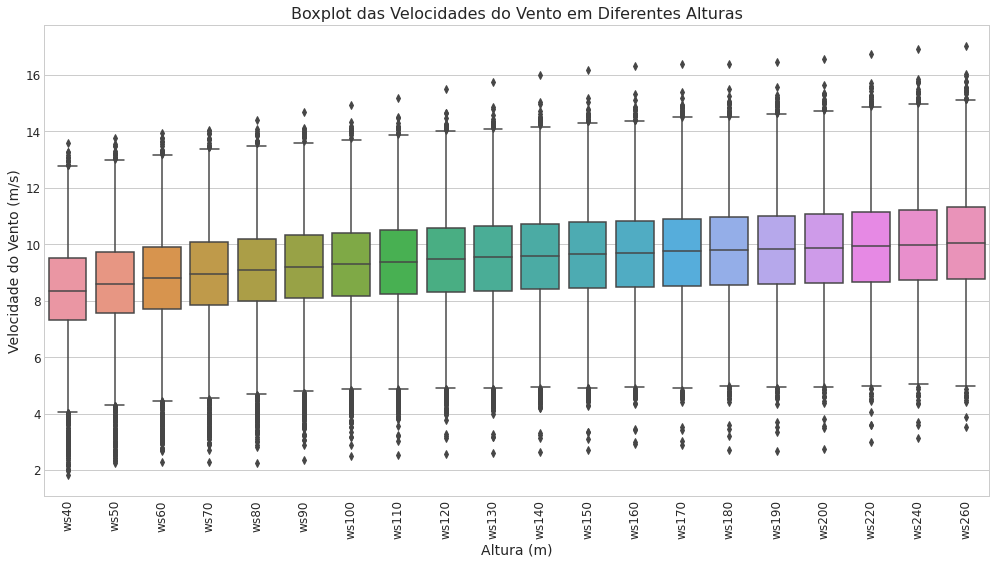

In [34]:
# Detectar possíveis outliers nas velocidades de vento usando boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[ws_cols])
plt.title('Boxplot das Velocidades do Vento em Diferentes Alturas', fontsize=16)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Velocidade do Vento (m/s)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

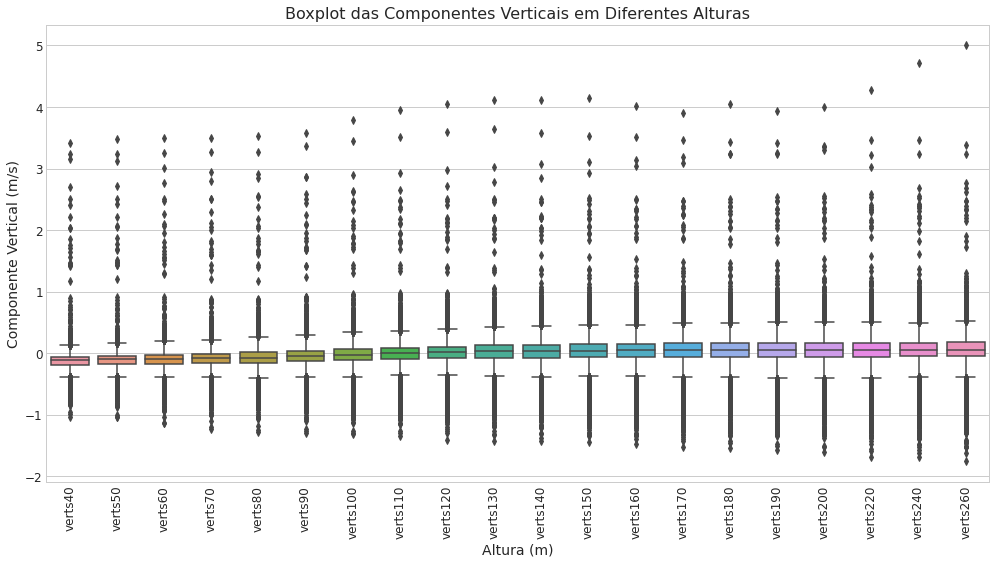

In [35]:
# Detectar possíveis outliers nas componentes verticais
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[verts_cols])
plt.title('Boxplot das Componentes Verticais em Diferentes Alturas', fontsize=16)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Componente Vertical (m/s)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4. Distribuição das Principais Variáveis

Vamos analisar a distribuição das principais variáveis para entender melhor o comportamento dos dados.

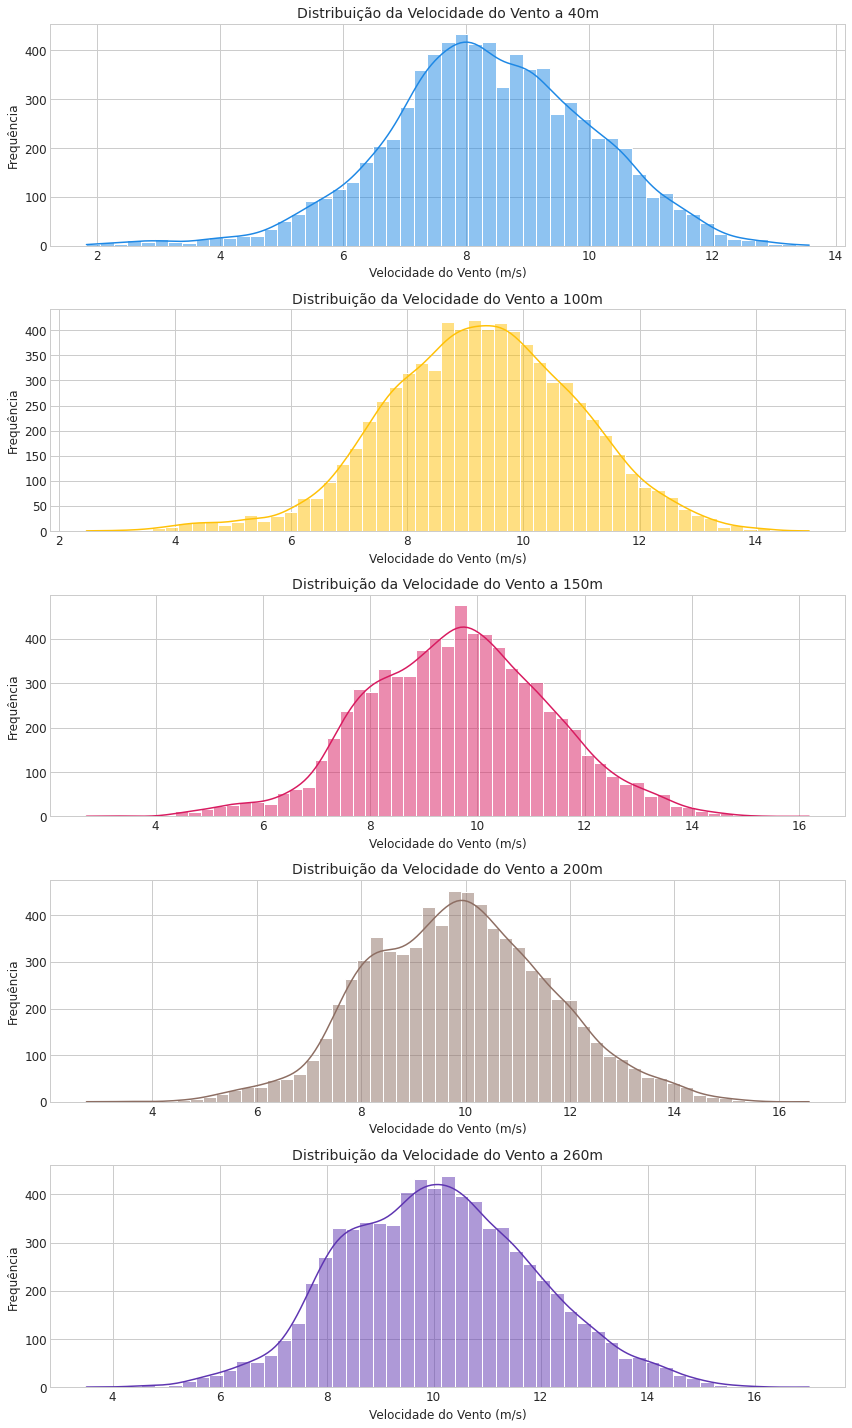

In [36]:
# Selecionar algumas alturas representativas para análise
heights = [40, 100, 150, 200, 260]
ws_selected = [f'ws{h}' for h in heights if f'ws{h}' in df.columns]

# Plotar histogramas para velocidades de vento em diferentes alturas
fig, axes = plt.subplots(len(ws_selected), 1, figsize=(12, 4*len(ws_selected)))

for i, col in enumerate(ws_selected):
    sns.histplot(df[col], kde=True, ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_title(f'Distribuição da Velocidade do Vento a {col.replace("ws", "")}m', fontsize=14)
    axes[i].set_xlabel('Velocidade do Vento (m/s)', fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()

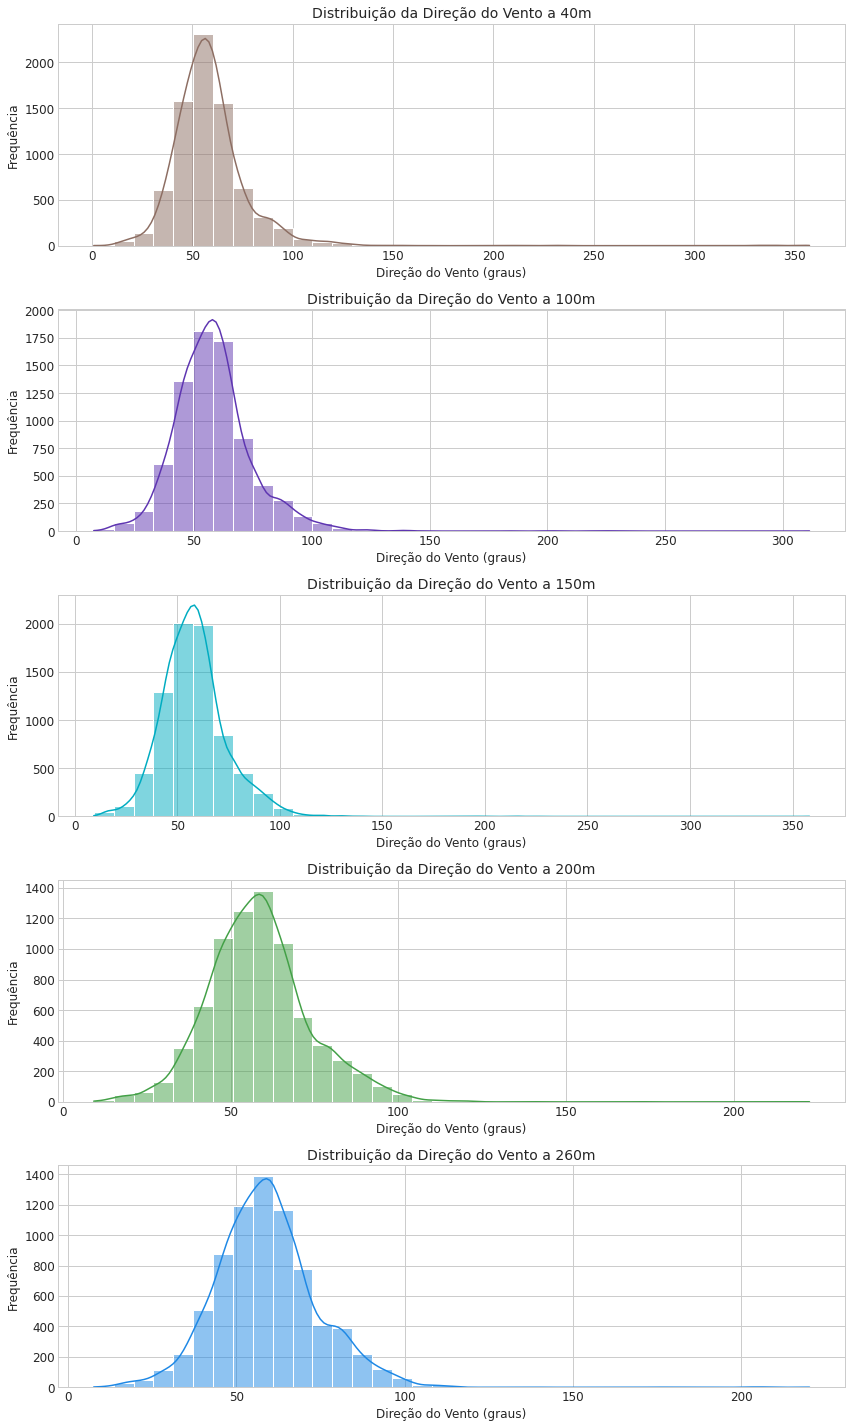

In [37]:
# Plotar distribuições da direção do vento em algumas alturas representativas
wdir_selected = [f'wdir{h}' for h in heights if f'wdir{h}' in df.columns]

fig, axes = plt.subplots(len(wdir_selected), 1, figsize=(12, 4*len(wdir_selected)))

for i, col in enumerate(wdir_selected):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=36, color=colors[(i+3) % len(colors)])
    axes[i].set_title(f'Distribuição da Direção do Vento a {col.replace("wdir", "")}m', fontsize=14)
    axes[i].set_xlabel('Direção do Vento (graus)', fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()

## 5. Análise Temporal Básica

Vamos examinar como as principais variáveis variam ao longo do tempo.

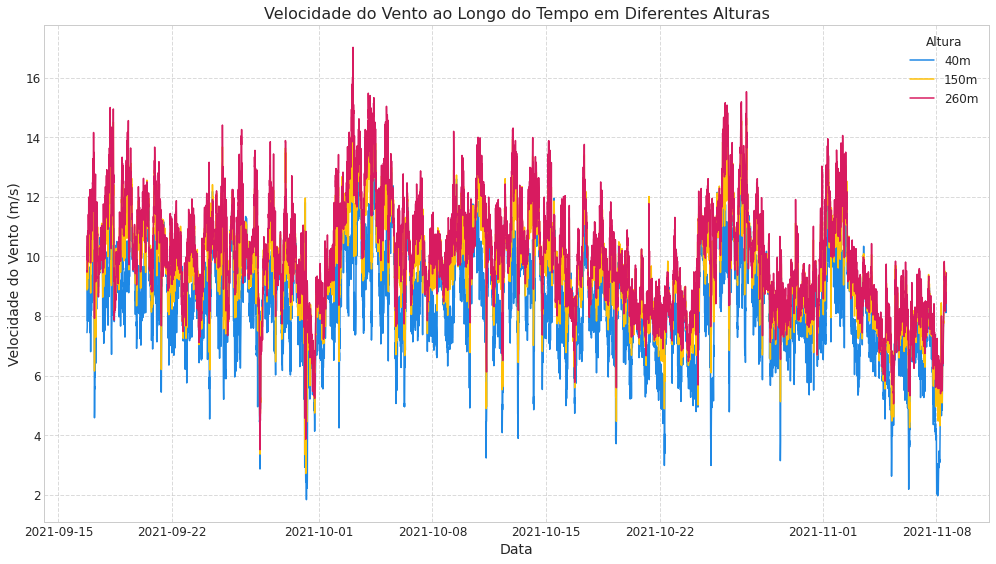

In [38]:
# Selecionar algumas alturas representativas
ws_selected = [f'ws{h}' for h in [40, 150, 260] if f'ws{h}' in df.columns]

# Plotar série temporal da velocidade do vento
plt.figure(figsize=(14, 8))
for col in ws_selected:
    plt.plot(df.index, df[col], label=f'{col.replace("ws", "")}m')

plt.title('Velocidade do Vento ao Longo do Tempo em Diferentes Alturas', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Velocidade do Vento (m/s)', fontsize=14)
plt.legend(title='Altura', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

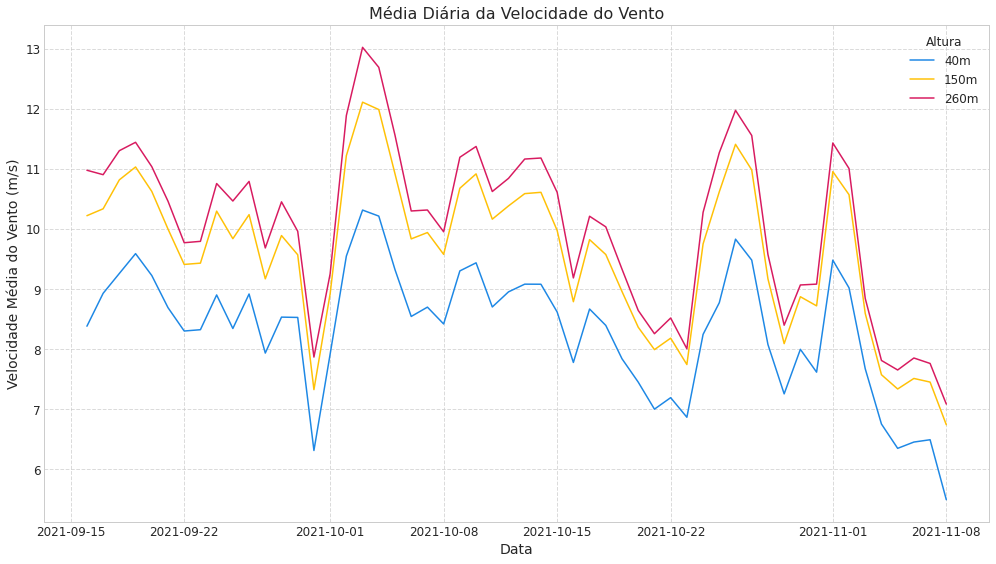

In [39]:
# Analisar média diária da velocidade do vento
daily_avg = df[ws_cols].resample('D').mean()

plt.figure(figsize=(14, 8))
for col in ws_selected:
    plt.plot(daily_avg.index, daily_avg[col], label=f'{col.replace("ws", "")}m')

plt.title('Média Diária da Velocidade do Vento', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Velocidade Média do Vento (m/s)', fontsize=14)
plt.legend(title='Altura', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6. Correlação entre Variáveis

Vamos analisar a correlação entre diferentes variáveis para identificar relações importantes.

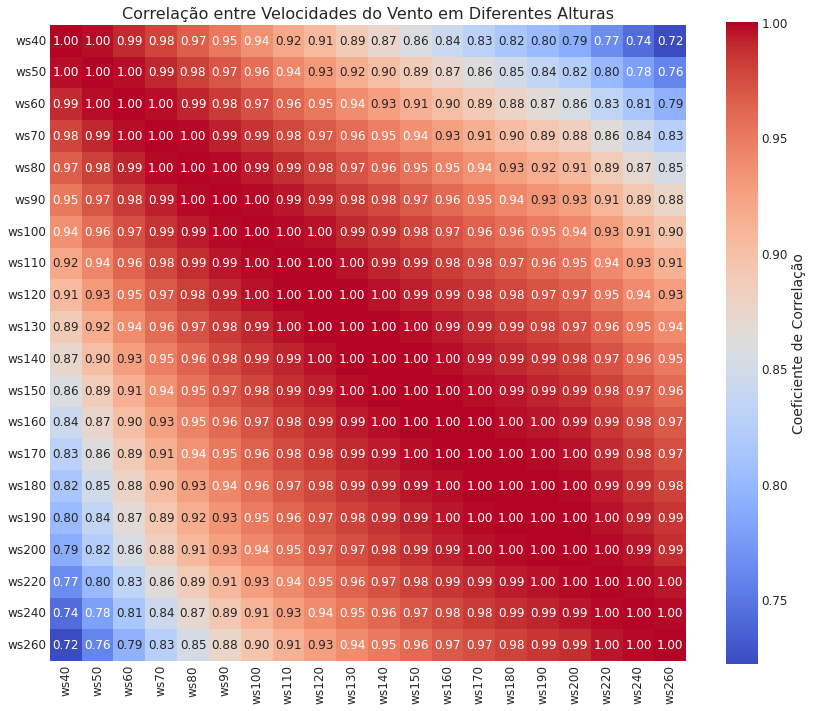

In [40]:
# Calcular correlação entre velocidades do vento em diferentes alturas
ws_corr = df[ws_cols].corr()

# Plotar mapa de calor da correlação
plt.figure(figsize=(12, 10))
sns.heatmap(ws_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Correlação entre Velocidades do Vento em Diferentes Alturas', fontsize=16)
plt.tight_layout()
plt.show()

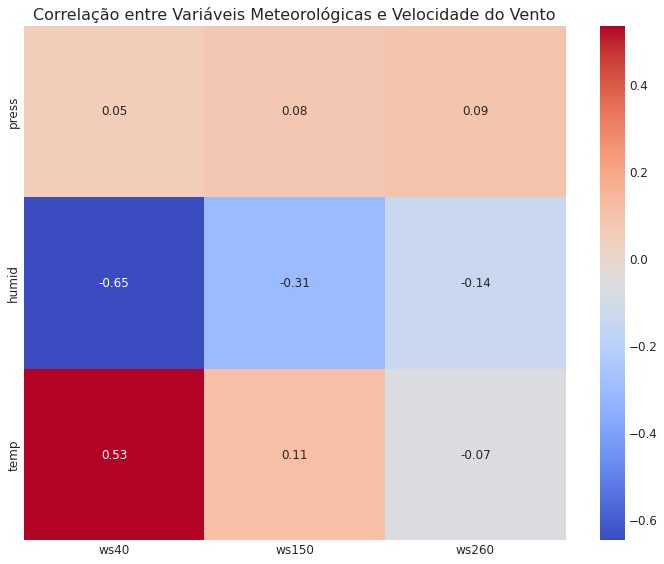

In [41]:
# Analisar correlação entre variáveis meteorológicas e velocidade do vento
if 'press' in df.columns and 'humid' in df.columns and 'temp' in df.columns:
    meteo_cols = ['press', 'humid', 'temp']
    meteo_ws_cols = meteo_cols + ws_selected
    meteo_ws_corr = df[meteo_ws_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(meteo_ws_corr.loc[meteo_cols, ws_selected], annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlação entre Variáveis Meteorológicas e Velocidade do Vento', fontsize=16)
    plt.tight_layout()
    plt.show()

## 7. Análise do Perfil Vertical de Vento

O perfil vertical de vento nos dá informações importantes sobre como a velocidade e direção do vento variam com a altura.

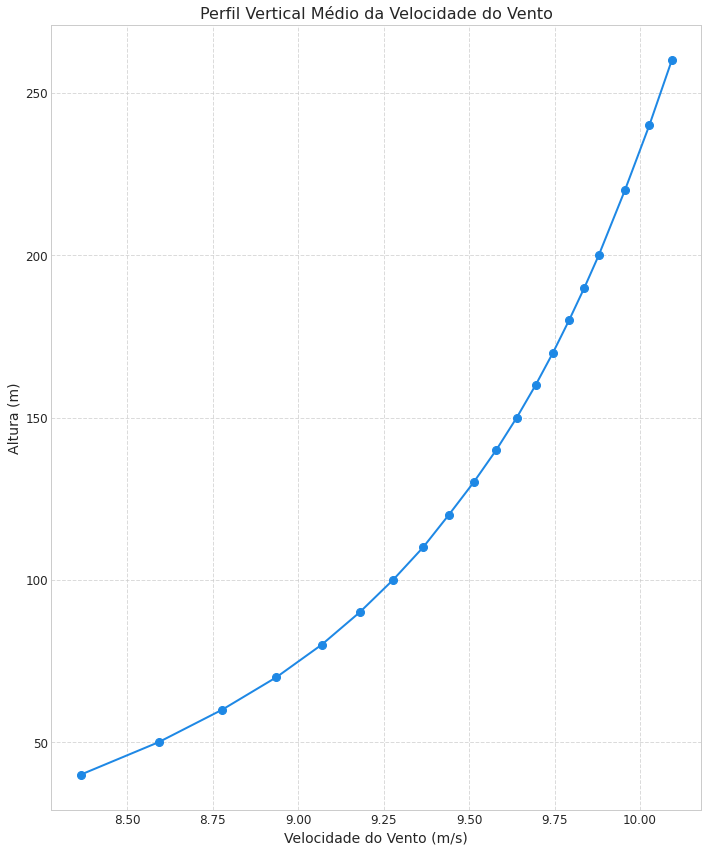

In [42]:
# Calcular perfil médio de velocidade do vento
mean_ws = df[ws_cols].mean()
heights_ws = [int(col.replace('ws', '')) for col in ws_cols]

plt.figure(figsize=(10, 12))
plt.plot(mean_ws.values, heights_ws, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Perfil Vertical Médio da Velocidade do Vento', fontsize=16)
plt.xlabel('Velocidade do Vento (m/s)', fontsize=14)
plt.ylabel('Altura (m)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

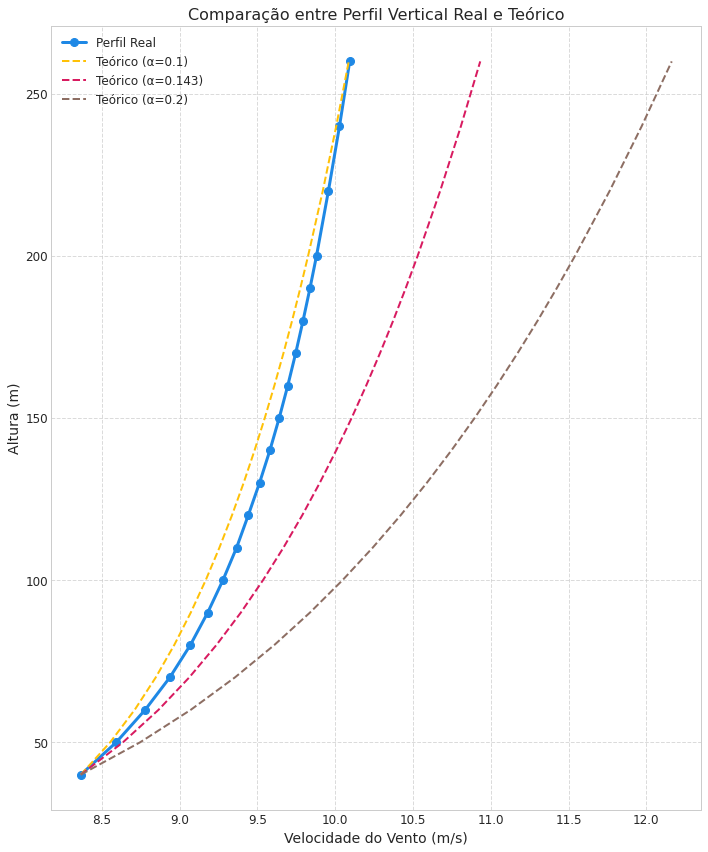

In [43]:
# Comparar com o perfil teórico (lei de potência)
ref_height = 40  # altura de referência
ref_speed = mean_ws['ws40']  # velocidade na altura de referência

# Calcular perfil teórico com diferentes expoentes
alphas = [0.1, 0.143, 0.2]  # diferentes expoentes para comparação
heights_range = np.array(heights_ws)

plt.figure(figsize=(10, 12))

# Plotar perfil real
plt.plot(mean_ws.values, heights_ws, marker='o', linestyle='-', linewidth=3, 
         markersize=8, label='Perfil Real', color=colors[0])

# Plotar perfis teóricos
for i, alpha in enumerate(alphas):
    theoretical_speeds = [utils.windspeed_profile_law(h, ref_height, ref_speed, alpha) for h in heights_range]
    plt.plot(theoretical_speeds, heights_range, linestyle='--', linewidth=2, 
             label=f'Teórico (α={alpha})', color=colors[i+1])

plt.title('Comparação entre Perfil Vertical Real e Teórico', fontsize=16)
plt.xlabel('Velocidade do Vento (m/s)', fontsize=14)
plt.ylabel('Altura (m)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
# Calcular o expoente de cisalhamento do vento
alpha, r_squared = utils.calculate_wind_shear_exponent(heights_ws, mean_ws.values)
print(f"Expoente de cisalhamento do vento calculado: {alpha:.4f}")
print(f"Coeficiente de determinação (R²): {r_squared:.4f}")

Expoente de cisalhamento do vento calculado: 0.0988
Coeficiente de determinação (R²): 0.9948


## 8. Conclusões Preliminares

Com base na análise exploratória inicial, podemos destacar os seguintes pontos:

1. **Estrutura dos Dados**: O conjunto de dados contém informações detalhadas sobre o perfil de vento em diferentes alturas, incluindo velocidade, direção e componentes verticais.

2. **Perfil Vertical**: A velocidade do vento tende a aumentar com a altura, seguindo aproximadamente uma lei de potência.

3. **Variação Temporal**: Foi observada uma variação temporal significativa nas velocidades do vento, o que sugere a influência de fatores meteorológicos.

4. **Correlações**: Existe uma forte correlação positiva entre velocidades do vento em alturas adjacentes, que diminui à medida que a diferença de altura aumenta.

Nos próximos notebooks, exploraremos com mais detalhes a variação da velocidade e direção do vento, bem como análises mais avançadas dos perfis verticais e características do cisalhamento.

In [45]:
# Salvar figura do perfil vertical médio para uso futuro
plt.figure(figsize=(10, 12))
plt.plot(mean_ws.values, heights_ws, marker='o', linestyle='-', linewidth=2, markersize=8, color=colors[0])
plt.title('Perfil Vertical Médio da Velocidade do Vento', fontsize=16)
plt.xlabel('Velocidade do Vento (m/s)', fontsize=14)
plt.ylabel('Altura (m)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../images/perfil_vertical_medio.png', dpi=300, bbox_inches='tight')
plt.close()